## Bharat Intern Task : Stock Prediction

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

## Load and preprocess data

In [2]:
data = pd.read_csv('AMZN.csv')
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

## Prepare sequences

In [4]:
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

## Build and train LSTM model

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 9s 71ms/step - loss: 0.1110
Epoch 2/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0268
Epoch 3/100
6/6 [==============================] - 0s 66ms/step - loss: 0.0152
Epoch 4/100
6/6 [==============================] - 0s 67ms/step - loss: 0.0159
Epoch 5/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0095
Epoch 6/100
6/6 [==============================] - 0s 68ms/step - loss: 0.0091
Epoch 7/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0077
Epoch 8/100
6/6 [==============================] - 0s 66ms/step - loss: 0.0068
Epoch 9/100
6/6 [==============================] - 0s 65ms/step - loss: 0.0065
Epoch 10/100
6/6 [==============================] - 0s 66ms/step - loss: 0.0063
Epoch 11/100
6/6 [==============================] - 0s 67ms/step - loss: 0.0061
Epoch 12/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0058
Epoch 13/100
6/6 [==============================]

## Make predictions

In [8]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 2s 31ms/step


## Plot actual vs predicted prices

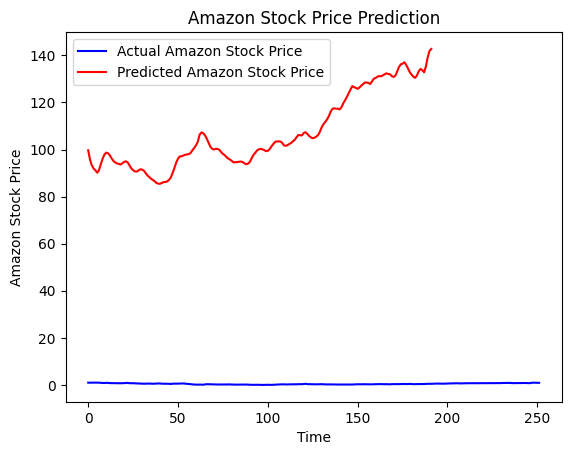

In [9]:
plt.plot(data, color='blue', label='Actual Amazon Stock Price')
plt.plot(predictions, color='red', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

## Prepare data for future predictions

In [10]:
future_X = data[-60:]
future_X = scaler.transform(future_X)
future_X = np.reshape(future_X, (1, future_X.shape[0], 1))

## Make future predictions

In [11]:
future_predictions = []
for i in range(30):
    prediction = model.predict(future_X)
    future_predictions.append(prediction[0, 0])
    prediction = np.reshape(prediction, (1, 1, 1))
    future_X = np.append(future_X[:, 1:, :], prediction, axis=1)


future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 56ms/step


## Plot future predictions

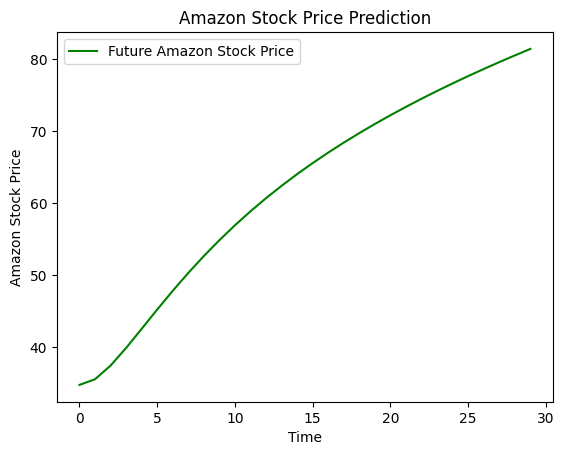

In [12]:
plt.plot(future_predictions, color='green', label='Future Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()